# Logistic regresion:

Links of additional good resources:

  Github of "Python Data Science Handbook": https://github.com/jakevdp/PythonDataScienceHandbook

  Colab version of "Python Data Science Handbook": https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb

  A Colab related to Scikit-Learn: https://colab.research.google.com/github/rugantio/MachineLearningCourse/blob/master/class06_Scikit-Learn.ipynb#scrollTo=9AsDtWyfJJau


## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

/tmp/ipykernel_5100/972192858.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


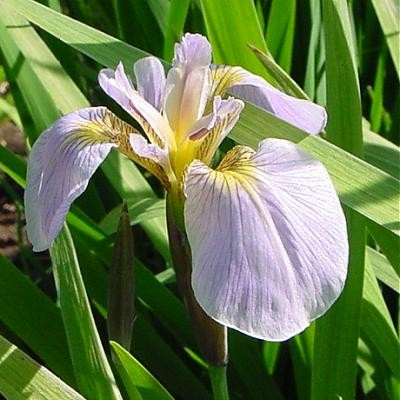

Iris Setosa



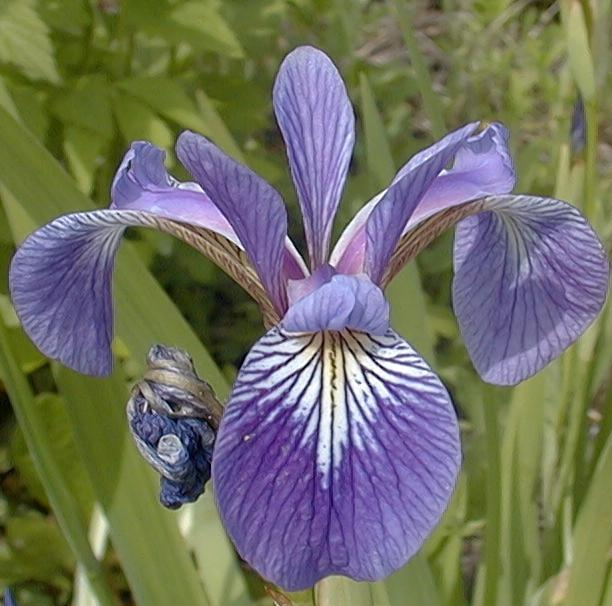

Iris Versicolor



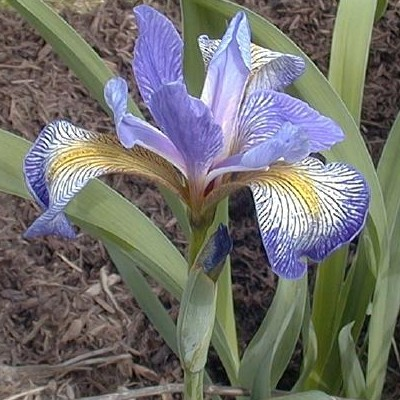

Iris Virginica


In [1]:
from IPython.core.display import Image, display
display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-setosa-10_1.jpg', width=200, height=200))
print ("Iris Setosa\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-versicolor-21_1.jpg', width=200, height=200))
print ("Iris Versicolor\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg', width=200, height=200))
print ("Iris Virginica")

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm


- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:] # We are just takin 1 feature from the datset: petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
X.shape #We have 150 registries on the dataset

/tmp/ipykernel_5100/1059705561.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0


(150, 1)

##Visualization of two features from Iris dataset

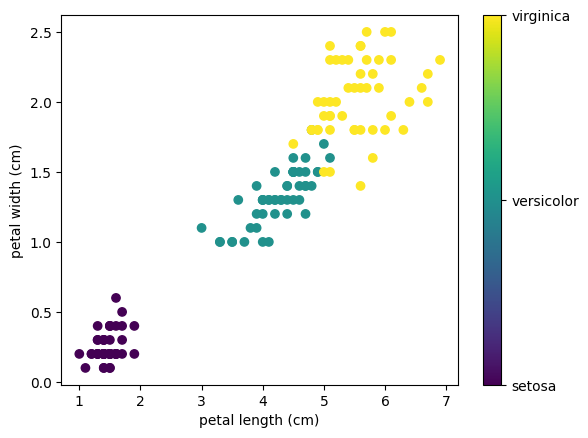

In [3]:
import matplotlib.pyplot as plt

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

## Split Dataset into Train/Test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state = 42)
X_train.shape

(135, 1)

## Definitions and the class to predict, calculate the loss and train the logistic model

In [5]:

def _sigmoid(z):
    return 1.0/(1 + np.exp(-(z)))

def _loss(y, y_hat):
    loss = -np.mean(y * (np.log(y_hat)) + (1 - y) * np.log(1-y_hat))
    return loss


class LogisticReg:
    
    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    # training step
    def fit(self, X, y, debug = False):
        
        # M is the size of samples
        # N is the size of features
        m, n = X.shape
        
        self.weights = np.zeros((n, 1))
        self.bias = 0
        
        # for safety
        y = y.reshape(m, 1)
        
        # save the history, for debug information
        losses = list()
        b_list = list()
        w_list = list()
        
        # gradient loop
        for epoch in range(self.epochs):
            
            # calculate prediction
            y_hat = _sigmoid(np.dot(X, self.weights) + self.bias)
            
            # calculate and save current loss
            loss = _loss(y, y_hat)
            losses.append(loss)
            
            # calculate gradient
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum((y_hat - y))
            
            # update parameters
            self.weights = self.weights - self.lr * dw            
            self.bias = self.bias - self.lr * db
            
            # save the parameters
            w_list.append(self.weights)
            b_list.append(self.bias)
            
            # print
            if (debug and epoch % 100 == 0):
                print(f"epoch: {epoch}, loss: {np.round(loss, 4)}")
            
        return self.weights, self.bias, losses, b_list, w_list    

    # the probability predicted
    def prob_predict(self, X):
        preds = _sigmoid(np.dot(X, self.weights) + self.bias)
        return np.array(preds)

    # the class predicted
    def predict(self, X):
        preds = self.prob_predict(X)
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        return np.array(pred_class)

In [6]:
model = LogisticReg(lr = 0.01, epochs = 50000)
w, b, loss, b_list, w_list = model.fit(X_train, y_train, debug = True)
w, b

epoch: 0, loss: 0.6931
epoch: 100, loss: 0.6627
epoch: 200, loss: 0.6351
epoch: 300, loss: 0.6102
epoch: 400, loss: 0.5876
epoch: 500, loss: 0.567
epoch: 600, loss: 0.5484
epoch: 700, loss: 0.5313
epoch: 800, loss: 0.5158
epoch: 900, loss: 0.5015
epoch: 1000, loss: 0.4884
epoch: 1100, loss: 0.4763
epoch: 1200, loss: 0.4651
epoch: 1300, loss: 0.4548
epoch: 1400, loss: 0.4452
epoch: 1500, loss: 0.4363
epoch: 1600, loss: 0.428
epoch: 1700, loss: 0.4202
epoch: 1800, loss: 0.4129
epoch: 1900, loss: 0.4061
epoch: 2000, loss: 0.3997
epoch: 2100, loss: 0.3936
epoch: 2200, loss: 0.3879
epoch: 2300, loss: 0.3825
epoch: 2400, loss: 0.3774
epoch: 2500, loss: 0.3725
epoch: 2600, loss: 0.3679
epoch: 2700, loss: 0.3635
epoch: 2800, loss: 0.3593
epoch: 2900, loss: 0.3553
epoch: 3000, loss: 0.3515
epoch: 3100, loss: 0.3478
epoch: 3200, loss: 0.3443
epoch: 3300, loss: 0.341
epoch: 3400, loss: 0.3377
epoch: 3500, loss: 0.3347
epoch: 3600, loss: 0.3317
epoch: 3700, loss: 0.3288
epoch: 3800, loss: 0.326
ep

(array([[5.90152856]]), -9.572418646493698)

## Plot the loss through the training

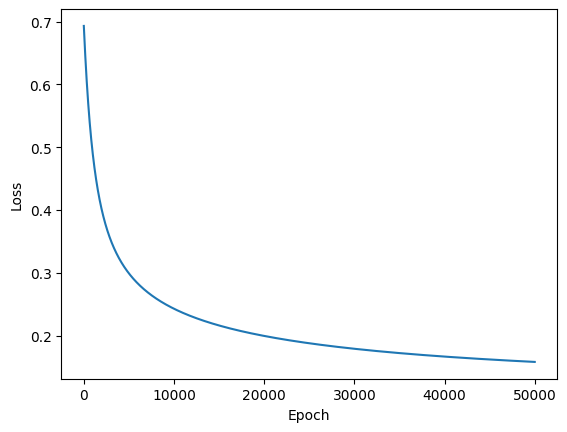

In [7]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## Plot the results

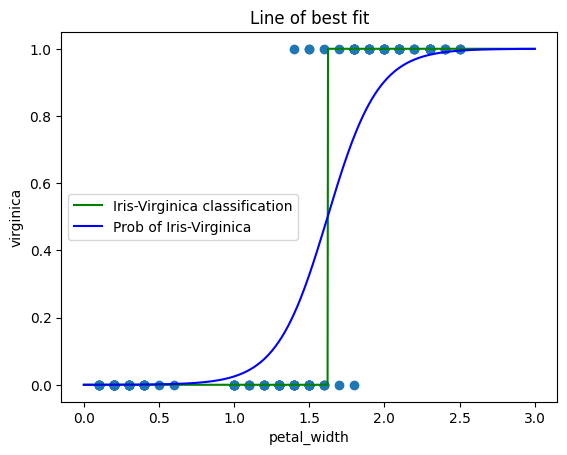

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_class = model.predict(X_new)                       
y_proba = model.prob_predict(X_new)

#Plot predictions as line of best fit
#plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_class, "g-", label="Iris-Virginica classification")
plt.plot(X_new, y_proba, "b-", label="Prob of Iris-Virginica")
#plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

#Plot dataset points
xpoints = X
ypoints = y 
plt.scatter(xpoints, ypoints)

#Axis names:
plt.xlabel('petal_width')
plt.ylabel('virginica')
plt.title('Line of best fit')

#Adding a vertical line to indicate the decision boundary
#plt.vlines([1.54], 0, 1, colors='r') 

plt.legend()
plt.show()

## Accuracy on test and training sets

In [9]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy


print("Accuracy on  test: ", accuracy(y_test, y_hat=model.predict(X_test)))

Accuracy on  test:  1.0


In [10]:
print("Accuracy on  train: ", accuracy(y_train, y_hat=model.predict(X_train)))

Accuracy on  train:  0.9555555555555556


## Confusion Matrix
### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [11]:
from sklearn import metrics

y_pred = model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12,  0],
       [ 0,  3]])

### Visualize CFM (confusion matrix) using a heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

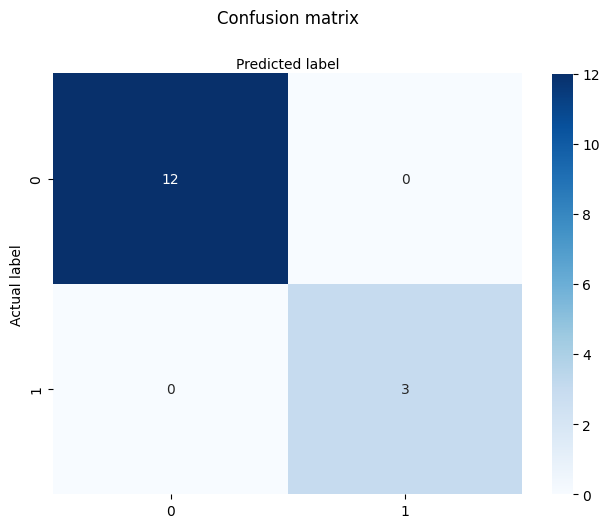

In [14]:
import seaborn as sns
import pandas as pd

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g') #another color map for confusion matrix: YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metrics Accuracy, Precision, Recall

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# Now, the logistic regrecion with Scikit-Learn
Example cosidering petal length and width Iris dataset

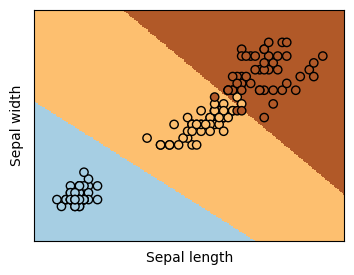

In [16]:
#Code from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Confusion Matrix, for the Scikit-Learn example
### Evaluate model using confusion matrix
This is basically looking at how well your model did on predictions

In [17]:
from sklearn import metrics

y_pred = logreg.predict(X)
cnf_matrix = metrics.confusion_matrix(Y, y_pred)
cnf_matrix

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

### Visualize CFM (confusion matrix) using a heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

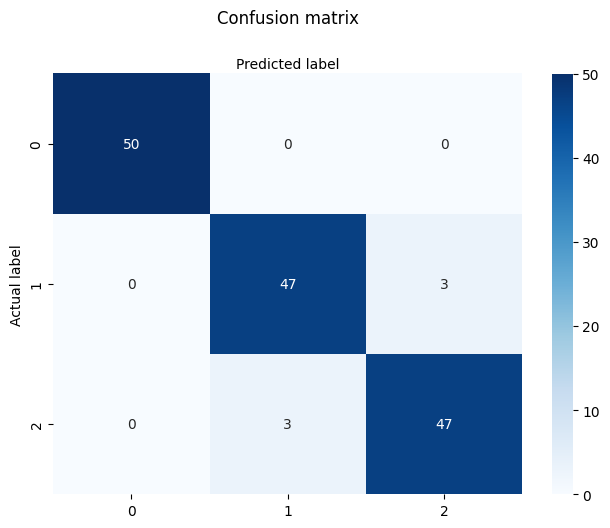

In [18]:
import seaborn as sns
import pandas as pd

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g') #another color map for confusion matrix: YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Evaluation metrics Accuracy, Precision, Recall

In [19]:
print("Accuracy:",metrics.accuracy_score(Y, y_pred))
print("Precision:",metrics.precision_score(Y, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(Y, y_pred, average = 'weighted'))

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
